In [1]:
import pandas as pd
import datetime
import holidays

In [2]:
dati = pd.read_csv(r'Dati_PUN_17_19.csv', parse_dates = ['Data'])
sinusoidi = pd.read_csv(r'sinusoidi.csv')

In [3]:
dati['Giorno'] = dati['Data'].apply(lambda x: x.date().strftime('%A'))

In [4]:
iatly_holidays = holidays.Italy(years = [2017, 2018, 2019])

In [5]:
def get_holiday(row):
    row = row.date()
    iatly_holidays = holidays.Italy(years = [2017, 2018, 2019])
    if row in iatly_holidays:
        return(1)
    else:
        return(0)    

In [6]:
dati['Giorno_Vacanza'] = dati['Data'].apply(get_holiday)

In [7]:
dati.head()

,Data,PUN,Giorno,Giorno_Vacanza
0,2017-01-01 00:00:00,53.30,Sunday,1
1,2017-01-01 01:00:00,52.00,Sunday,1
2,2017-01-01 02:00:00,51.00,Sunday,1
3,2017-01-01 03:00:00,47.27,Sunday,1
4,2017-01-01 04:00:00,45.49,Sunday,1


In [8]:
dati['Giorno_Vacanza'].value_counts()

0    28200
1      984
Name: Giorno_Vacanza, dtype: int64

Corretto poichè ci sonp 12 giorni festivi spalamati su 24 ore e 3 anni. Quindi 12 * 24 * 3 = 864

In [9]:
dummies = pd.get_dummies(dati['Giorno'])

In [10]:
frames = [dati, dummies, sinusoidi]

In [11]:
dati = pd.concat(frames, axis = 1)

In [12]:
dati = dati.drop(columns = ['Giorno'])

In [13]:
dati

,Data,PUN,Giorno_Vacanza,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,sinu365.23,sinu365.24,sinu365.25,sinu365.26,sinu365.27,sinu365.28,sinu365.29,sinu365.30,sinu365.31,sinu365.32
0,2017-01-01 00:00:00,53.30,1,0,0,0,1,0,0,0,...,0.248940,-0.160575,-0.543105,-0.834370,-0.985424,-0.970882,-0.793190,-0.482206,-0.090190,0.316982
1,2017-01-01 01:00:00,52.00,1,0,0,0,1,0,0,0,...,-0.482206,0.316982,0.912053,0.919817,0.335276,-0.465162,-0.966065,-0.844881,-0.179645,0.601271
2,2017-01-01 02:00:00,51.00,1,0,0,0,1,0,0,0,...,0.685111,-0.465162,-0.988531,-0.179645,0.871351,0.748017,-0.383428,-0.998123,-0.267636,0.823547
3,2017-01-01 03:00:00,47.27,1,0,0,0,1,0,0,0,...,-0.844881,0.601271,0.748017,-0.721775,-0.631740,0.823547,0.499069,-0.903946,-0.353445,0.960885
4,2017-01-01 04:00:00,45.49,1,0,0,0,1,0,0,0,...,0.951454,-0.721775,-0.267636,0.975336,-0.656411,-0.353445,0.991269,-0.585696,-0.436373,0.999121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29179,2020-04-30 19:00:00,31.00,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29180,2020-04-30 20:00:00,37.04,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29181,2020-04-30 21:00:00,29.80,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29182,2020-04-30 22:00:00,22.87,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dati["df24"] = dati['PUN'].shift(24)

In [15]:
dati= dati.loc[dati['Data'] < '2020-01-01']

In [16]:
dati.index = pd.DatetimeIndex(dati.Data)

In [17]:
dati.drop('Data', axis=1, inplace=True)

C:\Users\mpich\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
# dividing the dataset in training and test set
dati.dropna(inplace=True)
mask_test = dati.index > "2019-12-25"
mask_train = dati.index <= "2019-12-25"

test = dati.loc[mask_test]
train = dati.loc[mask_train]
train

C:\Users\mpich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PUN,Giorno_Vacanza,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,sinu365.1,...,sinu365.24,sinu365.25,sinu365.26,sinu365.27,sinu365.28,sinu365.29,sinu365.30,sinu365.31,sinu365.32,df24
Data,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,53.00,0,0,1,0,0,0,0,0,-0.624210,...,0.777214,-0.976740,0.442168,0.424728,-0.972408,0.789245,-0.012901,-0.773138,0.978103,53.30
2017-01-02 01:00:00,50.18,0,0,1,0,0,0,0,0,-0.258300,...,-0.868168,0.703677,0.504648,-0.964378,-0.006451,0.967711,-0.493468,-0.712786,0.861693,52.00
2017-01-02 02:00:00,49.11,0,0,1,0,0,0,0,0,0.151016,...,0.936591,-0.204966,-0.998497,-0.096613,0.969317,0.389378,-0.851712,-0.646623,0.656411,51.00
2017-01-02 03:00:00,48.15,0,0,1,0,0,0,0,0,0.534955,...,-0.980707,-0.359472,0.596104,0.997250,0.470863,-0.493468,-0.998830,-0.575190,0.383428,47.27
2017-01-02 04:00:00,48.41,0,0,1,0,0,0,0,0,0.828997,...,0.999371,0.808638,0.341347,-0.242687,-0.743720,-0.990397,-0.898354,-0.499069,0.070900,45.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24 20:00:00,45.70,0,0,0,0,0,0,1,0,-0.872929,...,-0.804826,0.992099,-0.927238,0.626727,-0.166938,-0.335276,0.752283,-0.978103,0.955346,40.99
2019-12-24 21:00:00,36.53,0,0,0,0,0,0,1,0,-0.603845,...,0.889685,-0.901169,0.198648,0.661263,-0.997250,0.543105,0.341347,-0.955346,0.812416,36.90
2019-12-24 22:00:00,27.46,0,0,0,0,0,0,1,0,-0.233289,...,-0.951454,0.521260,0.708246,-0.851712,-0.310857,0.996751,-0.154204,-0.924803,0.585696,31.96


In [19]:
# creating the final variables for training the model and then validating it

X_train = train.drop("PUN", axis=1).values
X_test = test.drop("PUN", axis=1).values
y_train = train['PUN'].values
y_test = test["PUN"].values

In [20]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='linear', C=5, gamma=1e-7, epsilon=1.5)

In [21]:
svr_rbf.fit(X_train, y_train)
predicted=svr_rbf.predict(X_test)
predicted_ = pd.DataFrame(predicted)
predicted_.head()

,0
0,7.519057
1,5.884397
2,5.468959
3,5.814021
4,6.298669


In [22]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index()
y_test.head()

len(predicted)

167

In [23]:
results_vect = pd.concat([y_test, predicted_], axis=1)
results_vect.columns = ['Datetime', 'Target', 'Reg']

predicted_final = predicted_.shift(-24)
results_vect = pd.concat([y_test, predicted_final], axis=1)
results_vect.columns = ['Datetime', 'Target', 'predicted_final']

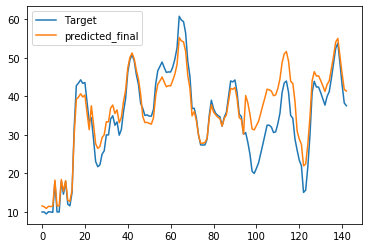

In [24]:
# plotting predicted vs target
results_vect.dropna(inplace=True)
results_vect[['Target', 'predicted_final']].plot()

In [25]:
# computing MAE value
results_vect['diff'] = abs(results_vect['Target'] - results_vect['predicted_final'])
results_vect['diff'].mean()

3.6647315308997634

In [26]:
# compouting MAPE value
results_vect['diff'] = (abs(results_vect['Target'] - results_vect['predicted_final'])/results_vect['Target'])
results_vect['diff'].mean()

0.12353497900353058

## Checking Performances on Training Set

In [27]:
svc_pred = svr_rbf.predict(X_train)

In [28]:
svc_pred_ = pd.DataFrame(svc_pred)
predicted_.head()

,0
0,7.519057
1,5.884397
2,5.468959
3,5.814021
4,6.298669


In [29]:
y_train = train['PUN'][24:].values
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index()

In [30]:
df5 = pd.concat([y_train, svc_pred_], axis=1)
df5 = ['Datetime', 'Target', 'Reg']

In [31]:
svc_final = svc_pred_.shift(-24)

In [32]:
df5 = pd.concat([y_train, svc_final], axis=1)
df5.columns = ['Datetime', 'Target', 'predicted_final']

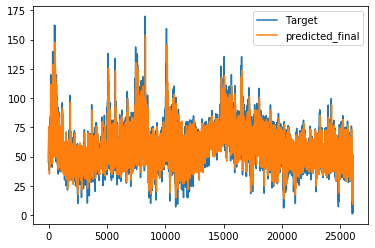

In [33]:
df5.dropna(inplace=True)
df5[['Target', 'predicted_final']].plot()

In [34]:
# computing MAE value
df5['diff'] = abs(df5['Target'] - df5['predicted_final'])
df5['diff'].mean()

5.839571168201262

In [35]:
# computing MAPE value
df5['diff'] = (abs(df5['Target'] - df5['predicted_final'])/df5['Target'])
df5['diff'].mean()

0.11386569939646748